In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\maheh\\Downloads\\PCA\\PCA\\wine.csv")
df


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.value_counts
df.columns


Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic'}>,
        <AxesSubplot:title={'center':'Ash'}>],
       [<AxesSubplot:title={'center':'Alcalinity'}>,
        <AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>],
       [<AxesSubplot:title={'center':'Nonflavanoids'}>,
        <AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color'}>,
        <AxesSubplot:title={'center':'Hue'}>],
       [<AxesSubplot:title={'center':'Dilution'}>,
        <AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

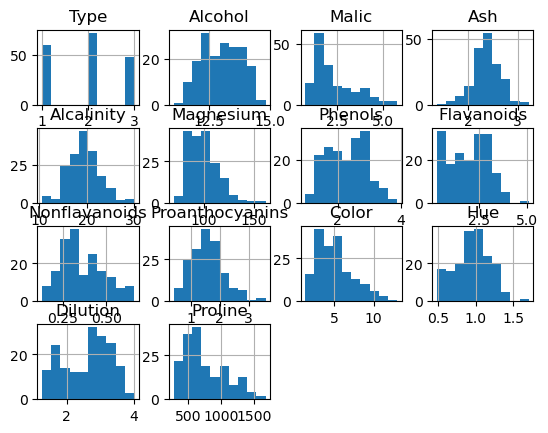

In [3]:
df.hist()

In [5]:
#X=df.iloc[:,1:]
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
#SS_X=SS.fit_transform(df)
#SS_X=pd.DataFrame(SS_X,columns=df.columns)
#SS_X

for column in df.columns:
    if df[column].dtype=='object':
        df[column]=SS.fit_transorm(df[column])
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<AxesSubplot:>

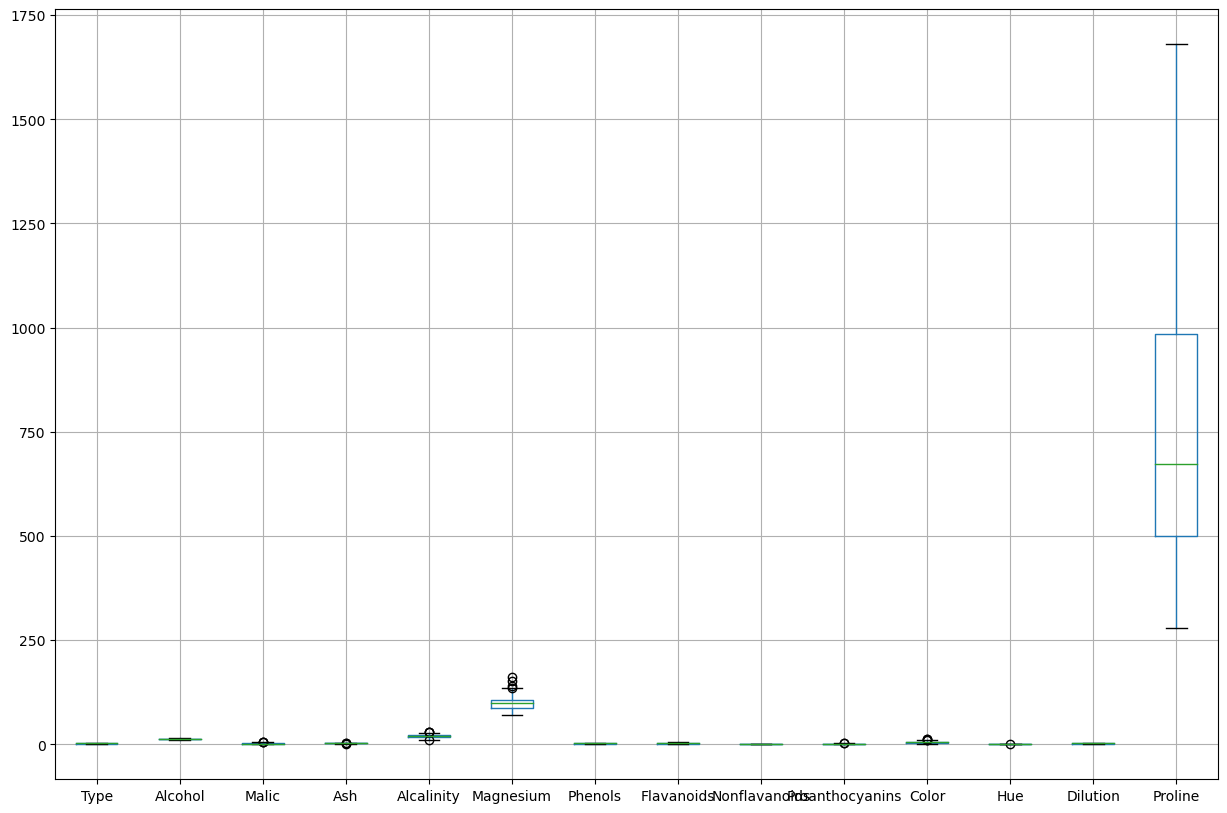

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df.boxplot()

In [7]:
#Removing Outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

#Limits
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

Outliers=((df<Lower_limit) | (df>Upper_limit))
df_clean=df[~Outliers.any(axis=1)]
print(f"Original dataset size: {df.shape}")
print(f"Size after removing outliers: {df_clean.shape}")


Original dataset size: (178, 14)
Size after removing outliers: (161, 14)


In [22]:
#Before PCA
Y=df_clean["Type"]
#Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_clean,Y,test_size=0.3)

#KMeansClustering
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier()
cls.fit(df_new,Y)

#Cross validation
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

import numpy as np
training_acc=[]
testing_acc=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(df_clean,Y,test_size=0.3,random_state=i)
    cls=KNeighborsClassifier(n_neighbors=9)
    cls.fit(df_clean,Y)
    cls.predict(X_train)
    cls.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    testing_acc.append(accuracy_score(Y_test,Y_pred_test))
print(f"Cross validation  training accuracy score is: {np.mean(np.round(training_acc,3))}")
print(f"Cross validation  testing accuracy score is: {np.mean(np.round(training_acc,3))}")



Cross validation  training accuracy score is: 0.34396
Cross validation  testing accuracy score is: 0.34396


In [44]:
#KMeansClustering
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=3,n_init=20)
df_clean["K_cluster"]=cluster.fit_predict(df_clean)

from sklearn.metrics import silhouette_score
score=silhouette_score(df_clean,df_clean["K_cluster"])
print("silhouette score is:",score.round(2))

#The silhouette score should be calculated using the features, not the cluster labels
#You should pass the feature data to the function while excluding the column "K_cluster"
#from sklearn.metrics import silhouette_score
score = []

for i in range(2, 11):
    cluster = KMeans(n_clusters=i, n_init=20)
    df_clean["K_cluster"] = cluster.fit_predict(df_clean.drop("K_cluster", axis=1, errors='ignore'))
    score.append(silhouette_score(df_clean.drop("K_cluster", axis=1), df_clean["K_cluster"]))
import numpy as np
np.mean(score)

C:\Users\maheh\AppData\Local\Temp\ipykernel_23720\3673037629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["K_cluster"]=cluster.fit_predict(df_clean)
C:\Users\maheh\AppData\Local\Temp\ipykernel_23720\3673037629.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["K_cluster"] = cluster.fit_predict(df_clean.drop("K_cluster", axis=1, errors='ignore'))
C:\Users\maheh\AppData\Local\Temp\ipykernel_23720\3673037629.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

silhouette score is: 0.57


C:\Users\maheh\AppData\Local\Temp\ipykernel_23720\3673037629.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["K_cluster"] = cluster.fit_predict(df_clean.drop("K_cluster", axis=1, errors='ignore'))
C:\Users\maheh\AppData\Local\Temp\ipykernel_23720\3673037629.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["K_cluster"] = cluster.fit_predict(df_clean.drop("K_cluster", axis=1, errors='ignore'))
C:\Users\maheh\AppData\Local\Temp\ipykernel_23720\3673037629.py:17: SettingWithCopyWarning

0.5702169429000146

In [78]:
#----->from 1.5 to qround 3.5 threshold too the entire data is getting deleted since the data is very small and and dispersed
# alot. so, we are ignoring this step


In [8]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(df_clean)
pc=pd.DataFrame(df_clean)
pc


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
df_new=pc.iloc[:,1:]
df_new


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,agg_sing
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
silhoutte Score: 0.52
     Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        1

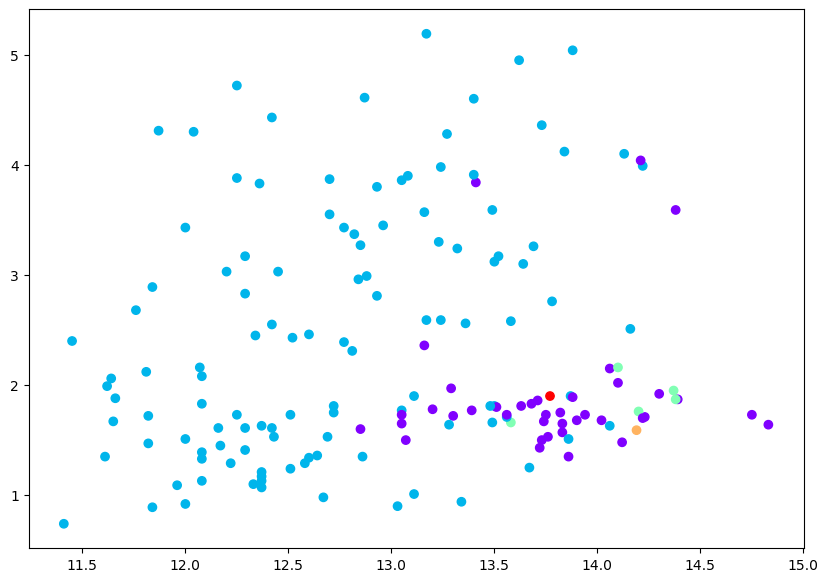

In [24]:
#hierarchial Clustering
Y=df_clean["Type"]
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,linkage="single")

df_new["agg_sing"]=cluster.fit_predict(df_new)
print(df.head())



import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],c=cluster.labels_,cmap="rainbow")


from sklearn.metrics import silhouette_score
score=silhouette_score(df_new,df_new["agg_sing"])
print("silhoutte Score:",score.round(2))
print(df_new)
print(Y)

In [25]:
#Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_new,Y,test_size=0.3)

#KMeansClustering
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier()
cls.fit(df_new,Y)


KNeighborsClassifier()

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_train,Y_pred_train)#comparing predictions(Y_pred_train) to the actual labels(Y_train)
cm

array([[16, 16,  8],
       [17, 17, 11],
       [11,  8,  8]], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred_test)#comparing predictions(Y_pred_train) to the actual labels(Y_train)
cm

array([[8, 7, 3],
       [3, 9, 4],
       [5, 4, 6]], dtype=int64)

In [28]:
#After PCA
#Cross validation
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

import numpy as np
training_acc=[]
testing_acc=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(df_new,Y,test_size=0.3,random_state=i)
    cls=KNeighborsClassifier(n_neighbors=9)
    cls.fit(df_new,Y)
    cls.predict(X_train)
    cls.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    testing_acc.append(accuracy_score(Y_test,Y_pred_test))
print(f"Cross validation  training accuracy score is: {np.mean(np.round(training_acc,3))}")
print(f"Cross validation  testing accuracy score is: {np.mean(np.round(training_acc,3))}")

Cross validation  training accuracy score is: 0.34396
Cross validation  testing accuracy score is: 0.34396


In [42]:
#KMeansClustering
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=3,n_init=20)
df_new["K_cluster"]=cluster.fit_predict(df_new)

from sklearn.metrics import silhouette_score
score=silhouette_score(df_new,df_new["K_cluster"])
print("silhouette score is:",score.round(2))

#The silhouette score should be calculated using the features, not the cluster labels
#You should pass the feature data to the function while excluding the column "K_cluster"
#from sklearn.metrics import silhouette_score
score = []

for i in range(2, 11):
    cluster = KMeans(n_clusters=i, n_init=20)
    df_new["K_cluster"] = cluster.fit_predict(df_new.drop("K_cluster", axis=1, errors='ignore'))
    score.append(silhouette_score(df_new.drop("K_cluster", axis=1), df_new["K_cluster"]))
import numpy as np
np.mean(score)

silhouette score is: 0.57


0.5704058778756527

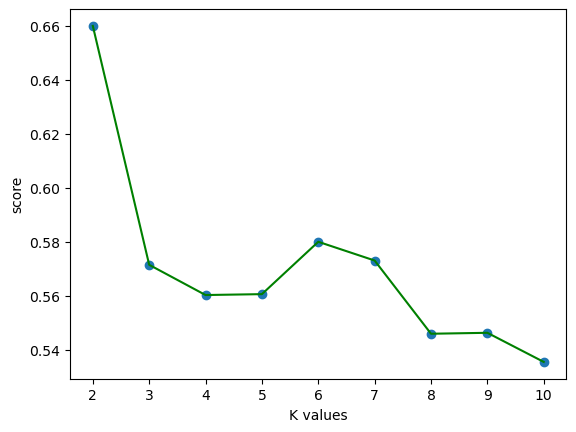

In [43]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11),score)
plt.plot(range(2,11),score,color='green')
plt.xlabel("K values")
plt.ylabel("score")
plt.show()

#Insights
the accuracy score is same before and after PCA using KMeansNeighboursClassifier
using Clustering the silhouette score is around 0.57 before and after PCA 
--->KMeansclustering is better for this data 